In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv('Cleaned_Data.csv')

In order to look at the relationship between movie budgets and return on investment more generally, the movies were put into three categories: low budget, mid-range budget, and high budget. These categories were determined first by looking at the distribution of the total cost data for the data set. The 25% quartile was approximately 20 million, so that was assigned the low budget. The 75% quartile was 100 million, so all budgets over that was assigned to high budget. Any movie that cost between 20 million and 100 million was classified as a mid-range budget. When looking at the number of movies assigned to each category, the low budget was changed to movies under 25 million to create a more even distribution of movies in each category. A new column was added to the data frame to denote their budget classication. The code is shown below:

In [7]:
df['budget_category'] = df['total_costs'].apply(lambda x: 'low' if x < 25000000 else ('mid' if x < 100000000 else 'high' ))

In [282]:
#low_budget = df[df['budget_category'] == 'low']
#mid_budget = df[df['budget_category'] == 'mid']
#high_budget = df[df['budget_category'] == 'high']

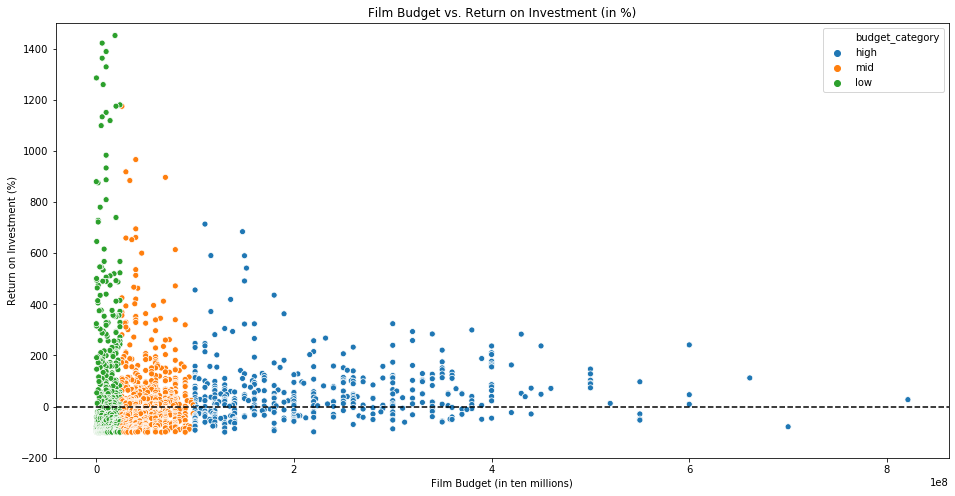

In [295]:
fig, ax = plt.subplots(figsize = (16, 8))
sns.scatterplot(data = df, x = 'total_costs', y = 'ROI', hue = 'budget_category', ax = ax)
plt.ylim(-200, 1500)
#plt.xlim(None, 600000000)


plt.xlabel('Film Budget (in ten millions)')
plt.ylabel('Return on Investment (%)')
plt.title('Film Budget vs. Return on Investment (in %)')
ax.axhline(y=0, color = 'black', ls = '--')
plt.show()



The first step in the analysis was to determine if there is a correlation between the amount of money invested in a movie and the return on investment. This will help decide if it is more beneficial to invest in larger blockbuster movies or if there is more return for smaller, low budget films. A scatterplot was created with the film's budget (production and advertisement costs) on the x-axis and the return on investment as a percentage on the y-axis. This was further broken down by the low, mid, and high budget classification to more clearly show the divide between the budgets.

This plot shows that there is no correlation between a film's budget and it's return on investment. The correlation coefficient is -0.05, further confirming no correlation. Larger movies do not yield a larger return on investment. In fact, all the highest returns on investment are for low budget films. 

There were a few outliers not shown in this plot to more clearly show the remainder of the data. These data points were from low budget films. There are significantly fewer high-end outliers for middle and high budgets. 

In [275]:
#fig, ax = plt.subplots(figsize = (16,8))
#ax1 = plt.scatter(x = low_budget['total_costs'], y = low_budget['ROI'], color = 'red', )
#ax2 = plt.scatter(x = mid_budget['total_costs'], y = mid_budget['ROI'], color = 'blue')
#ax3 = plt.scatter(x = high_budget['total_costs'], y = high_budget['ROI'], color = 'green')
#ax.axhline(y=0, color = 'black')

In [150]:
budget_mean = df.groupby('budget_category')['ROI'].mean()
budget_mean

budget_category
high     58.799028
low     208.967988
mid      45.227444
Name: ROI, dtype: float64

In [276]:
budget_median = df.groupby('budget_category')['ROI'].median()
budget_median

budget_category
high    32.661031
low     -1.745305
mid      4.854692
Name: ROI, dtype: float64

Text(0.5, 1.0, 'Budget Category vs Median ROI')

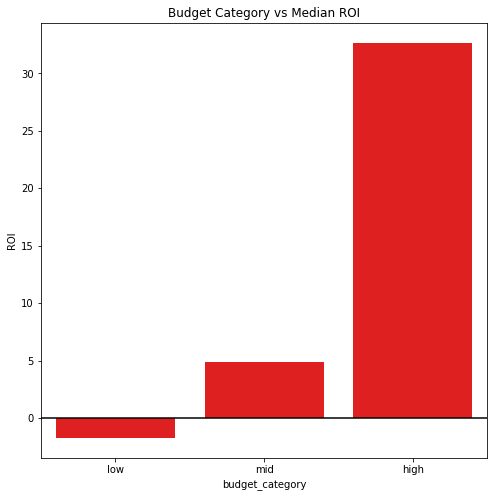

In [279]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.barplot(data = df, x = budget_median.index, y = budget_median, color = 'red', order = ['low', 'mid', 'high'])
ax.axhline(y= 0, color = 'black')
ax.set_title('Budget Category vs Median ROI')

Median was used to account for outliers. 

In [ ]:
fig, ax = plt.subplots(figsize = (8,8))
sns.barplot(data = df3, x = budget_mean.index, y = budget_mean, color = 'red')
ax.set_title('Budget Category vs. Average ROI')

/Users/laurenphipps/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


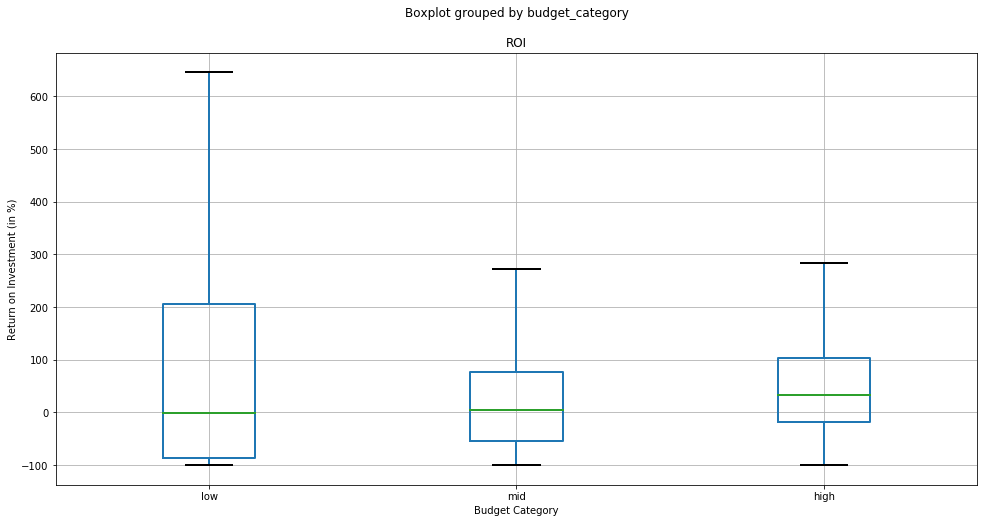

In [299]:
fig, ax = plt.subplots(figsize = (16,8))
df.boxplot(column = ['ROI'], by = ['budget_category'], ax=ax, showfliers = False, positions = [2, 0, 1],
           boxprops= dict(linewidth=2.0, color='blue'), 
           whiskerprops=dict(linestyle='-',linewidth=2.0, color='black'), 
           medianprops = dict(linewidth = 2.0, color = 'red'), capprops = dict(linewidth = 2.0))
ax.set_ylabel('Return on Investment (in %)')
ax.set_xlabel('Budget Category')
plt.show()

In [272]:
action = df[df['genres_Action_id'] == 1]
adventure = df[df['genres_Adventure_id'] == 1]
comedy = df[df['genres_Comedy_id'] == 1]
family = df[df['genres_Family_id'] == 1]
thriller = df[df['genres_Thriller_id'] == 1]
documentary = df[df['genres_Documentary_id'] == 1]
other = df[df['genres_tuple'] == '(0, 0, 0, 0, 0, 0, 0)']
drama = df[df['genres_Drama_id'] == 1]

In order to be able to analyze each genre, the data set was separated into eight smaller data sets based on it's genre classification. The distribution of the returns on investment could then be analyzed within each data set. 

/Users/laurenphipps/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


([<matplotlib.axis.XTick at 0x1a27633b70>,
 <a list of 8 Text xticklabel objects>)

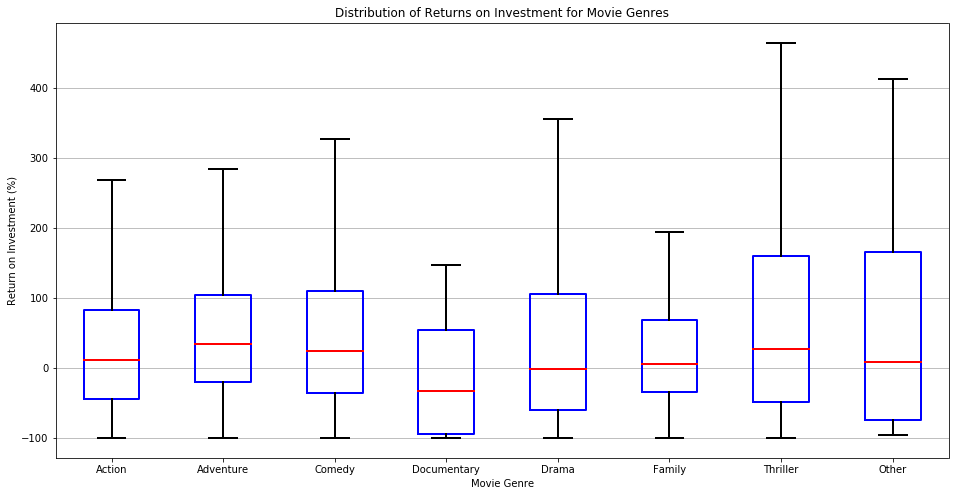

In [287]:
fig,  ax = plt.subplots(figsize = (16,8))
ax.boxplot([action['ROI'], 
            adventure['ROI'], 
            comedy['ROI'], 
            documentary['ROI'], 
            drama['ROI'], 
            family['ROI'], 
            thriller['ROI'], 
            other['ROI']], 
            showfliers = False, 
            boxprops= dict(linewidth=2.0, color='blue'), 
            whiskerprops=dict(linestyle='-',linewidth=2.0, color='black'), 
            medianprops = dict(linewidth = 2.0, color = 'red'), capprops = dict(linewidth = 2.0))

ax.set_title('Distribution of Returns on Investment for Movie Genres')
ax.set_ylabel('Return on Investment (%)')
ax.set_xlabel('Movie Genre')
plt.grid(which='major', axis='y')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8], ['Action', 'Adventure', 'Comedy', 'Documentary', 'Drama','Family', 'Thriller', 'Other'])


When investing in movies, it is important to know if certain genres lead to a higher return on investment than others. To answer this question, the data was broken into 7 genres. These were the most common genres contained in the data set. Some movies were categorized as more than one genre. Those movies are included in each of the listed genres. For example, if a movie is considered Action and Adventure, it's data in included in both genres because it is representative of both genres. The final category is "other" for any movies that did not fall into one of the seven listed genres. 

Because there is a wide range of values for returns on investment, it is beneficial to use a boxplot to get a more complete look at the data for each genre. Outliers have been excluded from this plot, but is still part of the data. Their impact can be seen from the range of the whiskers. The median is represented by the red line. Because of the significant outliers, the median is a better representation of the data than the mean. 

With the exception of documentaries, all genres have a median return on investment between 0% and 50%, with adventure and thriller movies having the highest. Most genres have their 25%-75% quartile range, so most of the data points, between 0 and 100% return. However, thriller movies have the most significant outliers and the highest 75% quartile range (with the exception of the other category). This means that there are more thriller movies that have a return on investment about 100%, with some ranging upwards of 400%. 

In [300]:
df.describe()

,Unnamed: 0,id,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes,advertisement_budget,profit,genres_not_parsed_id,genres_Action_id,genres_Adventure_id,genres_Comedy_id,genres_Drama_id,genres_Family_id,genres_Thriller_id,genres_Documentary_id,genres_num_of_parses,ROI,total_costs
count,1365.000000,1365.000000,1.365000e+03,1.365000e+03,1.365000e+03,1365.000000,1359.000000,1.365000e+03,1.365000e+03,1365.0,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1.365000e+03
mean,720.473260,50.795604,4.811613e+07,6.117461e+07,1.533262e+08,2013.866667,108.706402,4.811613e+07,5.709391e+07,0.0,0.306227,0.249817,0.353114,0.486447,0.063004,0.169963,0.023443,1.652015,98.385315,9.623225e+07
std,425.715722,28.458309,5.720284e+07,8.684681e+07,2.401767e+08,2.607475,17.721580,5.720284e+07,1.671892e+08,0.0,0.461094,0.433066,0.478113,0.499999,0.243059,0.375738,0.151362,0.663075,627.543212,1.144057e+08
min,0.000000,1.000000,2.500000e+04,0.000000e+00,2.600000e+01,2010.000000,5.000000,2.500000e+04,-5.502376e+08,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99.998700,5.000000e+04
25%,355.000000,26.000000,1.000000e+07,6.810754e+06,1.536230e+07,2012.000000,96.000000,1.000000e+07,-1.405621e+07,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-49.491100,2.000000e+07
50%,708.000000,51.000000,2.600000e+07,3.307827e+07,6.259916e+07,2014.000000,106.000000,2.600000e+07,5.885836e+06,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,15.639408,5.200000e+07
75%,1077.000000,75.000000,6.000000e+07,7.426203e+07,1.735676e+08,2016.000000,119.000000,6.000000e+07,6.404180e+07,0.0,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,109.013108,1.200000e+08
max,1542.000000,100.000000,4.106000e+08,7.000596e+08,2.048134e+09,2019.000000,180.000000,4.106000e+08,1.448134e+09,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,20728.237000,8.212000e+08


In [303]:
comedy.describe()

,Unnamed: 0,id,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes,advertisement_budget,profit,genres_not_parsed_id,genres_Action_id,genres_Adventure_id,genres_Comedy_id,genres_Drama_id,genres_Family_id,genres_Thriller_id,genres_Documentary_id,genres_num_of_parses,ROI,total_costs
count,482.000000,482.000000,4.820000e+02,4.820000e+02,4.820000e+02,482.000000,480.000000,4.820000e+02,4.820000e+02,482.0,482.000000,482.000000,482.0,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,4.820000e+02
mean,711.929461,49.759336,4.250898e+07,6.210417e+07,1.418331e+08,2013.657676,102.916667,4.250898e+07,5.681518e+07,0.0,0.170124,0.263485,1.0,0.319502,0.074689,0.006224,0.008299,1.842324,63.270208,8.501797e+07
std,393.853344,28.081263,4.422676e+07,7.595629e+07,2.060903e+08,2.618706,13.504555,4.422676e+07,1.514015e+08,0.0,0.376133,0.440981,0.0,0.466768,0.263162,0.078729,0.090813,0.598016,160.172905,8.845352e+07
min,10.000000,1.000000,5.000000e+04,0.000000e+00,2.600000e+01,2010.000000,63.000000,5.000000e+04,-2.169000e+08,0.0,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,-99.998700,1.000000e+05
25%,389.250000,27.000000,1.200000e+07,9.784696e+06,2.095546e+07,2011.000000,93.000000,1.200000e+07,-9.849848e+06,0.0,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,-36.189090,2.400000e+07
50%,684.500000,49.500000,2.800000e+07,3.966196e+07,6.932785e+07,2014.000000,101.000000,2.800000e+07,7.763176e+06,0.0,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,2.000000,23.943419,5.600000e+07
75%,1023.750000,73.750000,5.500000e+07,7.858613e+07,1.636116e+08,2016.000000,110.000000,5.500000e+07,6.369575e+07,0.0,0.000000,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,2.000000,109.573188,1.100000e+08
max,1532.000000,100.000000,2.600000e+08,4.862956e+08,1.272470e+09,2019.000000,163.000000,2.600000e+08,1.012336e+09,0.0,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,3.000000,1118.212521,5.200000e+08
